In [34]:
pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.comNote: you may need to restart the kernel to use updated packages.



In [40]:
import cv2
from cv2 import QRCodeDetector
import os
import matplotlib.pyplot as plt
import pyzbar.pyzbar as pyzbar

In [14]:
    def read_qr_code(cv2_img):
        """read the QR code.
        Args:
            cv2_img (np.array in cv2 format): image
        Returns:
            qr (string): Value from QR code
        """
        try:
            detect = cv2.QRCodeDetector()
            value, points, straight_qrcode = detect.detectAndDecode(cv2_img)
            return value, points, straight_qrcode
        except:
            return
        
    def LoadFrame(filename, dirpath):
        full_path = os.path.join(dirpath, filename)
        return cv2.imread(full_path)
    
    def PlotCv2ImageWithPlt(image, title='No Name'):
        RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img, interpolation='none')
        plt.title(title)
        plt.show()

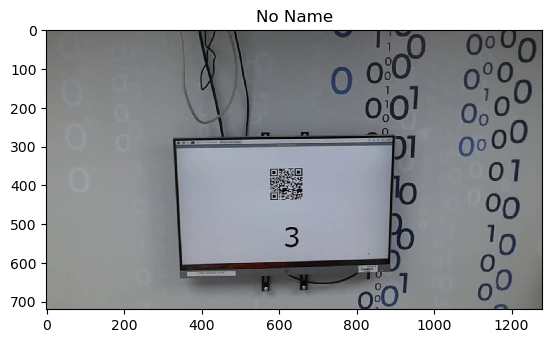

In [16]:
dirpath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pics_from_1658831841451"
filename = r"frame625.jpg"
ScreenFrame = LoadFrame(filename, dirpath)
PlotCv2ImageWithPlt(ScreenFrame)

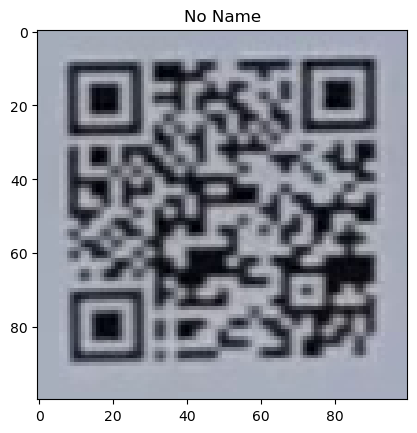

In [25]:
ScreenBarcode = ScreenFrame[350:350 + 100, 570:570 + 100]
PlotCv2ImageWithPlt(ScreenBarcode)

In [26]:
detect = cv2.QRCodeDetector()
detect.detectAndDecode(ScreenBarcode)

('', None, None)

In [27]:
image = ScreenFrame.copy()
scale = 0.3
width = int(image.shape[1] * scale)
height = int(image.shape[0] * scale)
image = cv2.resize(image, (width, height))

In [48]:
gray = cv2.cvtColor(ScreenFrame, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

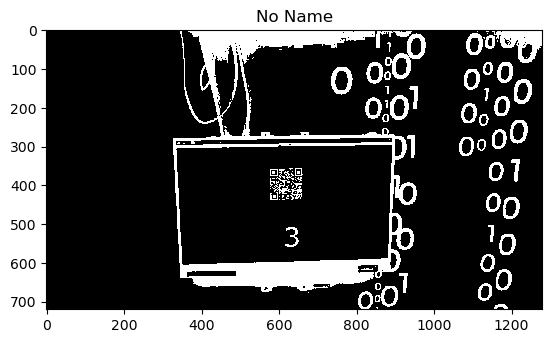

In [49]:
PlotCv2ImageWithPlt(thresh)

In [50]:
# The bigger the kernel, the more the white region increases.
# If the resizing step was ignored, then the kernel will have to be bigger
# than the one given here.
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

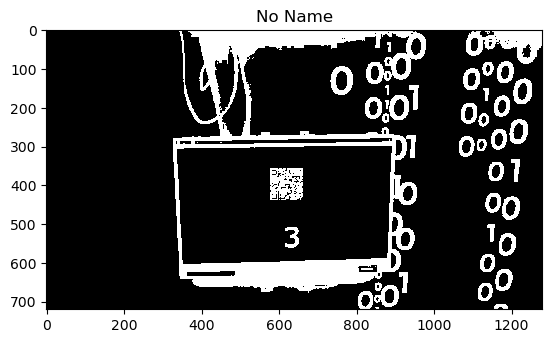

In [51]:
PlotCv2ImageWithPlt(thresh)

In [54]:
len(contours)

189

In [52]:
bboxes = []
for cnt in contours:
  area = cv2.contourArea(cnt)
  xmin, ymin, width, height = cv2.boundingRect(cnt)
  extent = area / (width * height)
  
  # filter non-rectangular objects and small objects
  if (extent > np.pi / 4) and (area > 100):
    bboxes.append((xmin, ymin, xmin + width, ymin + height))

In [53]:
bboxes

[(804, 674, 845, 720),
 (1114, 653, 1153, 700),
 (363, 622, 490, 636),
 (1160, 617, 1204, 674),
 (805, 607, 856, 626),
 (1120, 578, 1160, 626),
 (1169, 525, 1214, 583),
 (1178, 430, 1223, 490),
 (582, 423, 596, 437),
 (1134, 421, 1174, 472),
 (578, 419, 600, 441),
 (581, 362, 596, 376),
 (644, 361, 659, 375),
 (641, 357, 663, 379),
 (1141, 341, 1182, 392),
 (336, 299, 893, 606),
 (1065, 276, 1106, 328),
 (1149, 257, 1190, 310),
 (1071, 190, 1113, 244),
 (823, 175, 867, 232),
 (1156, 171, 1198, 226),
 (886, 169, 937, 235),
 (1206, 127, 1255, 194),
 (1077, 101, 1121, 158),
 (734, 96, 792, 170),
 (826, 84, 871, 142),
 (1163, 83, 1207, 140)]

In [59]:
qrs = []
info = set()
roi = ScreenBarcode
detections = pyzbar.decode(roi, symbols=[pyzbar.ZBarSymbol.QRCODE])
for barcode in detections:
    info.add(barcode.data)
    # bounding box coordinates
    x, y, w, h = barcode.rect
    qrs.append((xmin + x, ymin + y, xmin + x + w, ymin + y + height))
    

In [76]:
detections[0]

Decoded(data=b'green\norange\npink\nbrown\nred\nyellow\nblue\n', type='QRCODE', rect=Rect(left=7, top=7, width=84, height=83), polygon=[Point(x=7, y=9), Point(x=9, y=90), Point(x=91, y=87), Point(x=91, y=7)], quality=1, orientation='UP')

In [69]:
detections[0].data

b'green\norange\npink\nbrown\nred\nyellow\nblue\n'

In [71]:
full_string = detections[0].data

In [75]:
type(full_string)

bytes

In [77]:
str(full_string)

"b'green\\norange\\npink\\nbrown\\nred\\nyellow\\nblue\\n'"

In [82]:
string_repr = full_string.decode('utf-8')
print(type(string_repr))
print(string_repr)

<class 'str'>
green
orange
pink
brown
red
yellow
blue



In [90]:
str_list = string_repr.split("\n")
del str_list[-1]
str_list

[0]*8

['green', 'orange', 'pink', 'brown', 'red', 'yellow', 'blue']

In [88]:
if "green" in str_list:
    print("Horay")

Horay


In [2]:
string = "dobule" + str(0)
print(string)

dobule0
